In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
# city_data_df.head()

ride_data_df = pd.read_csv(ride_data_to_load)
# ride_data_df.head()

# Combine the data into a single dataset
pyber_merge_pd = pd.merge(ride_data_df, city_data_df, on="city", how="left")
# changing join type made no difference in outcomes, stuck with "left" since it matched example.

# Display the data table for preview
pyber_merge_pd.head()

# We now have a Data Frame with all the fares and other information we will use to get what we need.

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# Create a new Data Frame with the values we will need for the plots
#   get values

avgfare = pyber_merge_pd.groupby("city")["fare"].mean()
# avgfare

totrides = pyber_merge_pd.groupby("city")["ride_id"].count()
# totrides

totdrivers = pyber_merge_pd.groupby("city")["driver_count"].mean()
#totdrivers

citytype = city_data_df.set_index("city")["type"]
# citytype.value_counts()

#   new Data Frame
pyber_plotworthy = pd.DataFrame({"Average Fare": avgfare, 
                                 "Total Rides": totrides, 
                                 "Total Drivers": totdrivers, 
                                 "City Type": citytype
                                })
pyber_plotworthy.head()

# This chart is just easier to read and helps mostly with the scatter plot. Values were tested for pie charts, 
#   similar results obtained (differing only by .1 percent), one example left in code(commented out) in last pie.

,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

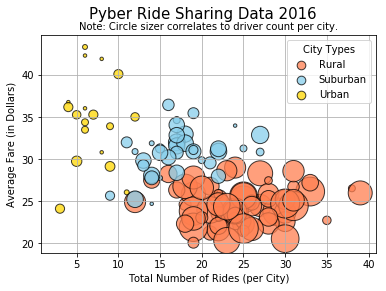

In [11]:
# Obtain the x and y coordinates for each of the three city types
#   Urban
urban = pyber_plotworthy.loc[pyber_plotworthy["City Type"]=="Urban"]

#   Suburban
suburban = pyber_plotworthy.loc[pyber_plotworthy["City Type"]=="Suburban"]

#   Rural
rural = pyber_plotworthy.loc[pyber_plotworthy["City Type"]=="Rural"]

# Build the scatter plots for each city types
#   Urban
plt.scatter(urban["Total Rides"], urban["Average Fare"], s=urban["Total Drivers"]*12, 
            facecolors="coral", edgecolors="black", alpha=.75, linewidths=1)

#   Suburban
plt.scatter(suburban["Total Rides"], suburban["Average Fare"], s=suburban["Total Drivers"]*12, 
            facecolors="skyblue", edgecolors="black", alpha=.75, linewidths=1)

#   Rural
plt.scatter(rural["Total Rides"], rural["Average Fare"], s=rural["Total Drivers"]*12, 
            facecolors="gold", edgecolors="black", alpha=.75, linewidths=1)

# Incorporate the other graph properties
plt.suptitle("Pyber Ride Sharing Data 2016", fontsize=15)
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare (in Dollars)")
plt.grid()

# Create a legend
legend = plt.legend(labels={"Rural", "Urban", "Suburban"}, title="City Types", loc=1)
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
# plt.text(45, 45, "Note: Circle sizer correlates to driver count per city.")  # orignal (old and busted)
plt.title("Note: Circle sizer correlates to driver count per city.", fontsize=10)  # new (hotness)

# Save Figure
plt.savefig("PyberPlot2016.png")
plt.show()

## Total Fares by City Type

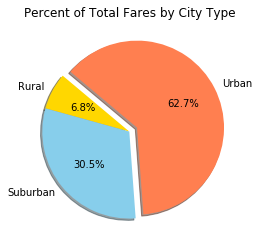

In [4]:
# Calculate Type Percents
farespieable = pyber_merge_pd.groupby(["type"])["fare"].sum()
# farespieable.index

# Build Pie Chart
piecolors = ["gold", "skyblue", "coral"]
farespieexplode = (0, 0, .1)
plt.pie(farespieable, labels=farespieable.index, colors = piecolors, autopct="%1.1f%%", 
        explode=farespieexplode, shadow=True, startangle=140)
plt.title("Percent of Total Fares by City Type")

# Save Figure
plt.savefig("FaresPie2016.png")
plt.show()

## Total Rides by City Type

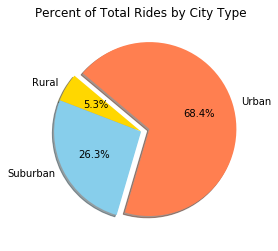

In [5]:
# Calculate Ride Percents
ridespieable = pyber_merge_pd.groupby(["type"])["ride_id"].count()
# ridespieable.index

# Build Pie Chart
piecolors = ["gold", "skyblue", "coral"]
ridespieexplode = (0, 0, .1)
plt.pie(ridespieable, labels=ridespieable.index, colors = piecolors, autopct="%1.1f%%", 
        explode=ridespieexplode, shadow=True, startangle=140)
plt.title("Percent of Total Rides by City Type")

# Save Figure
plt.savefig("RidesPie2016.png")
plt.show()

## Total Drivers by City Type

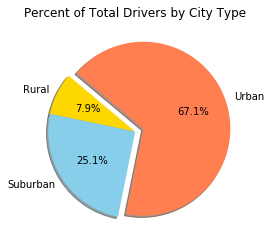

In [6]:
# Calculate Driver Percents
driverspieable = pyber_merge_pd.groupby(["type"])["driver_count"].mean()
# driverspieable = pyber_plotworthy.groupby(["City Type"])["Total Drivers"].mean()  # Comparison method
# driverspieable.index

# Build Pie Charts
piecolors = ["gold", "skyblue", "coral"]
driverspieexplode = (0, 0, .1)
plt.pie(driverspieable, labels=driverspieable.index, colors = piecolors, autopct="%1.1f%%", 
        explode=driverspieexplode, shadow=True, startangle=140)
plt.title("Percent of Total Drivers by City Type")

# Save Figure
plt.savefig("DriversPie2016.png")
plt.show()